# 分类问题

二元分类问题：
- 正向类 positive class
- 负向类 negative class

线性回归并不适用于分类问题

逻辑回归（Logistic Regression）：$0\le h_{\theta}(x)\le1$

逻辑回归的输出值永远在0到1之间

# 逻辑回归

### 假设函数

假设函数应该满足性质：$0\le h_{\theta}(x)\le1$

逻辑回归的假设为：

$$
h_{\theta}(x) = g(\theta^TX)
$$

其中 $g$ 代表逻辑函数(Logistic function / Sigmoid function) 公式为：

$$
g(z) = \frac{1}{1+e^{-z}}
$$

$h_{\theta}(x)$ 的作用是对于给定的输入变量，根据选择的参数计算出y=1的可能性，即 $h_{\theta}(x)=P(y=1|x;\theta)$

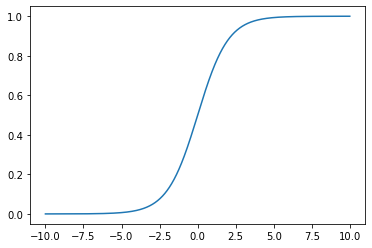

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def sigmoid(z):
    """Logistic function
    """
    return 1.0 / (1.0 + np.exp(-z))

x = np.arange(-10, 10, 0.01)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

# 决策边界 

### 逻辑回归
$
h_{\theta}(x) = g(\theta^Tx) \\
g(z) = \frac{1}{1+e^{-z}}
$

在逻辑回归中，当  
$h_{\theta}(x) \ge 0.5$ 时，预测 $y = 1$  
$h_{\theta}(x) < 0.5$ 时，预测 $y = 0$

因此  
$\theta^Tx \ge 0.5$ 时，预测 $y = 1$  
$\theta^Tx < 0.5$ 时，预测 $y = 0$

决策边界(decision boundary)为预测为1的区域和预测为0的区域的分界线。

**决策边界是假设函数的属性，其随着参数的确定而被确定，而不是数据集的属性。**

直线决策边界 $\theta_0 + \theta_1x_1 + \theta_2x_2$

圆形决策边界 $\theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1^2 + \theta_4x_2^2$

高阶的多项式可以得到非常复杂的决策边界。

# 代价函数



$$
h_{\theta}(x)=\frac{1}{1+e^{-\theta^Tx}}
$$

怎样选择参数 $\theta$ ?

如果逻辑回归使用线性回归同样的平方代价函数会导致 $J(\theta)$ 为**非凸函数**

重新定义逻辑回归的代价函数为：

$$
J(\theta)=\frac{1}{m}\sum_{i=1}^{m}{Cost(h_{\theta}(x^{(i)}), y^{(i)})}
$$

其中

$$
Cost(h_{\theta}(x), y)=\left\{
\begin{aligned}
-\log(h_{\theta}(x))\ \  if\ y=1 \\
-\log(1-h_{\theta}(x))\ \ if\ y=0
\end{aligned}
\right.
$$

显然假设函数计算出来的概率值会影响代价函数的大小

代价函数可以简写为

$$
Cost(h_{\theta}(x), y)=
-y \cdot \log(h_{\theta}(x))
-(1-y)\cdot \log(1 - h_{\theta}(x))
$$

y = 1 时前面一项不为0，y = 0时后面一项不为0

因此代价函数为

$$
J(\theta)
=-\frac{1}{m}[\sum_{i=1}^{m}
{
y \cdot \log(h_{\theta}(x))
+(1-y)\cdot \log(1 - h_{\theta}(x))
}]
$$

这是一个**凸函数**



# 梯度下降

迭代公式

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}{(h_{\theta}(x^{(i)})-y^{(i)})\cdot x_j^{(i)}}
$$

居然和线性回归的公式一模一样。

# 实现

In [49]:
def cost_function(x, y, theta):
    """代价函数
    """
    m = x.shape[0]
    y_eq_1 = -y * np.log(sigmoid(np.dot(x, theta.T)))
    y_eq_0 = -(1-y) * np.log(1-sigmoid(np.dot(x, theta.T)))
    return np.sum(y_eq_1 + y_eq_0) / m

In [48]:
# 加载数据集
data_path = './data.txt'
data = np.loadtxt(data_path, delimiter=',', dtype=np.double)
data[0:5, :]

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ]])

In [73]:
x = data[:, 0:2]
y = data[:, 2:3]
x = np.hstack((np.ones(y.shape), x))  # 补一列 x_0
theta = np.zeros((1, x.shape[1]))
x.shape, y.shape, theta.shape

((100, 3), (100, 1), (1, 3))

In [74]:
cost_function(x, y, theta)  # 测试代价函数

0.6931471805599453

In [75]:
def grad(x, y, theta):
    """梯度
    """
    m = x.shape[0]
    inner = sigmoid(np.dot(x, theta.T)) - y
    return (1/m) * np.dot(inner.T, x)    # 梯度

grad(x, y, theta)

array([[ -0.1       , -12.00921659, -11.26284221]])

In [107]:
def grad_desc(x, y, theta, alpha, iters):
    """梯度下降
    theta: 初始值
    alpha: 学习率
    iters: 最大迭代次数
    """
    m = x.shape[0]
    cost = [cost_function(x, y, theta)]              # 保存迭代过程中的代价
    _theta = theta.copy()                            # 拷贝一份
    for _i in range(iters):
        _theta  -= alpha * grad(x, y, _theta)        # 更新 theta 的值
        if _i % 10000 == 0:                          # 每迭代 1 万次记录代价
            cost.append(cost_function(x, y, _theta))
    return _theta, cost

In [115]:
best_theta, cost = grad_desc(x, y, theta, 0.001, 2000000)
best_theta

array([[-19.08468795,   0.15767916,   0.15228738]])

In [116]:
cost_function(x, y, best_theta)

0.21041324594328947

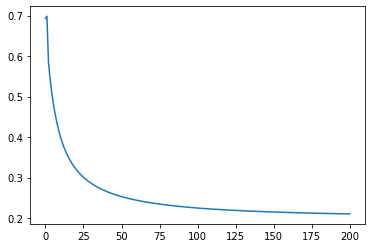

In [117]:
plt.plot(cost)
plt.show()

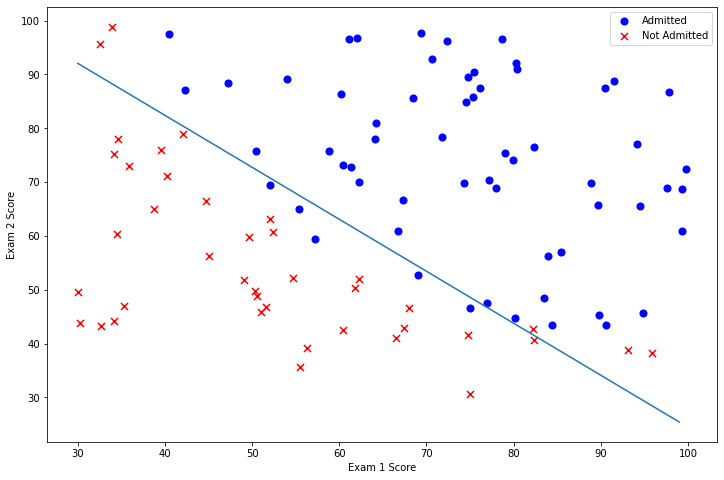

In [118]:
positive = np.array([item[0:2] for item in data if item[2] == 1])
negative = np.array([item[0:2] for item in data if item[2] == 0])
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive[:, 0], positive[:, 1], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative[:, 0], negative[:, 1], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

ex1 = np.arange(30, 100)
ex2 = (-best_theta[0,0] - best_theta[0, 2] * ex1) / best_theta[0, 1]
plt.plot(ex1, ex2)


plt.show()